### Importing Required Libraries

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Getting Required Data

In [98]:
tourism = pd.read_csv('../data/singapore_tourism_data/Final/tourism.csv')
display(tourism.head())

,DataSeries,year_month,no_of_visitors
0,Total International Visitor Arrivals By Inboun...,2024Dec,1357350
1,Southeast Asia,2024Dec,469730
2,Hong Kong SAR,2024Dec,22667
3,Taiwan,2024Dec,32223
4,Japan,2024Dec,46086


In [128]:
wait_time = pd.read_csv('../data/uss_wait_times/cleaned_2024_wait_times.csv')
display(wait_time.head())

,park,wait_time,date,time
0,Universal Studios Singapore,7,2024-01-01,10:00:00
1,Universal Studios Singapore,7,2024-01-01,10:05:00
2,Universal Studios Singapore,7,2024-01-01,10:10:00
3,Universal Studios Singapore,7,2024-01-01,10:15:00
4,Universal Studios Singapore,7,2024-01-01,10:20:00


In [100]:
four_day_forecast = pd.read_csv('../data/Meteorological/datasets/final_data/4_day_weather_forecasts.csv')
display(four_day_forecast.head())

,record_date,forecast_timestamp,forecast_date,day,temp_low,temp_high,humidity_low,humidity_high,forecast_summary,forecast_text,wind_speed_low,wind_speed_high,wind_direction
0,2016-03-19,2016-03-20T00:00:00+08:00,20/03/2016,Sunday,24,35,50,90,Warm. Afternoon showers.,Showers,10,20,NNE
1,2016-03-19,2016-03-21T00:00:00+08:00,21/03/2016,Monday,24,34,55,95,Afternoon and evening thundery showers.,Thundery Showers,10,20,NNW
2,2016-03-19,2016-03-22T00:00:00+08:00,22/03/2016,Tuesday,24,33,60,95,Afternoon and evening thundery showers.,Thundery Showers,10,25,NW
3,2016-03-19,2016-03-23T00:00:00+08:00,23/03/2016,Wednesday,25,33,60,95,Afternoon thundery showers.,Thundery Showers,10,20,WNW
4,2016-03-20,2016-03-21T00:00:00+08:00,21/03/2016,Monday,25,34,55,95,Afternoon thundery showers.,Thundery Showers,10,20,N


In [138]:
weather = pd.read_csv('../data/Meteorological/datasets/final_data/final_augmented_weather_sentosa_data.csv')
weather['Rain'] = weather['Daily Rainfall Total (mm)'].apply(lambda x: 1 if x > 0 else 0)
display(weather.head())

,Date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Rain
0,1/1/2016,5.2,4.2,4.2,4.2,27.1,28.9,24.7,6.5,24.5,1
1,2/1/2016,27.6,12.6,20.0,21.2,25.9,27.5,22.7,7.2,45.4,1
2,3/1/2016,2.0,1.2,1.6,1.8,26.4,27.7,25.0,6.8,25.2,1
3,4/1/2016,16.2,10.4,10.4,16.0,27.4,31.4,25.6,7.2,33.1,1
4,5/1/2016,0.0,0.0,0.0,0.0,28.9,32.5,26.6,7.6,34.2,0


In [102]:
events = pd.read_csv('../data/Events/EventData/supplementary_event_data_2016_2025.csv')
display(events.head())

,Date,Is_Event,Concert_Event,Sports_Event,MICE_Event,Theatre_Event,Cultural_Event,Social_Event,Event_Description
0,1/1/2016,0,0,0,0,0,0,0,0
1,1/2/2016,0,0,0,0,0,0,0,0
2,1/3/2016,0,0,0,0,0,0,0,0
3,1/4/2016,0,0,0,0,0,0,0,0
4,1/5/2016,0,0,0,0,0,0,0,0


In [103]:
school_holidays = pd.read_csv('../data/Events/Holidays/datasets/daily_school_holidays_combined.csv')
display(school_holidays.head())

,year,date,holiday_flag,holiday_category
0,2019,1/1/2019,0,NaN
1,2019,2/1/2019,0,NaN
2,2019,3/1/2019,0,NaN
3,2019,4/1/2019,0,NaN
4,2019,5/1/2019,0,NaN


In [104]:
public_holidays = pd.read_csv('../data/Events/Holidays/datasets/final_merged_PH_2020_2025.csv')
display(public_holidays.head())

,date,day,holiday
0,2020-01-01,Wednesday,New Year's Day
1,2020-01-25,Saturday,Chinese New Year
2,2020-01-26,Sunday,Chinese New Year
3,2020-04-10,Friday,Good Friday
4,2020-05-01,Friday,Labour Day


### Exploratory Data Analysis

#### Seasonality Trends

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


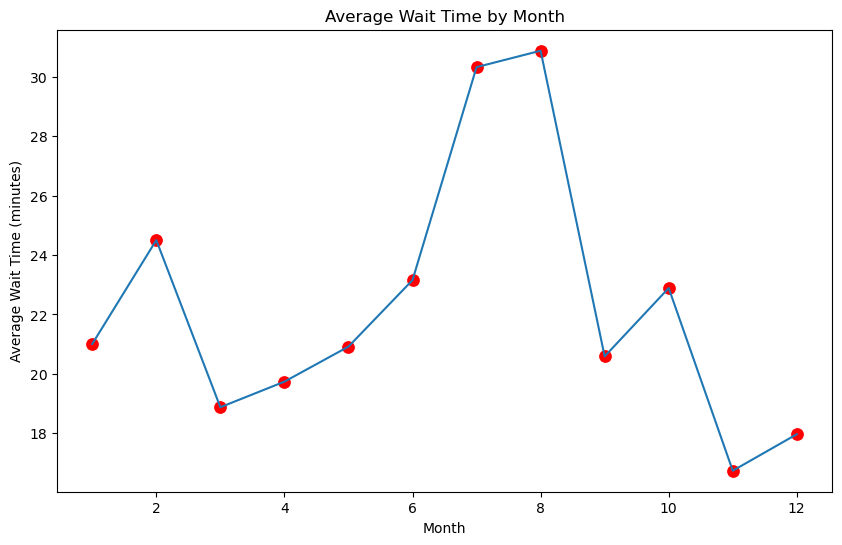

In [123]:
wait_time_month = wait_time
# Ensure that date is in datetime format
wait_time_month['date'] = pd.to_datetime(wait_time['date'])
wait_time_month['month'] = wait_time['date'].dt.month

# Group by month and calculate the average wait time
wait_time_month = wait_time_month.groupby('month')['wait_time'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=wait_time_month, x='month', y='wait_time', ax=ax)
sns.scatterplot(data=wait_time_month, x='month', y='wait_time', ax=ax, color='red', s=100)
ax.set_title('Average Wait Time by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Wait Time (minutes)')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


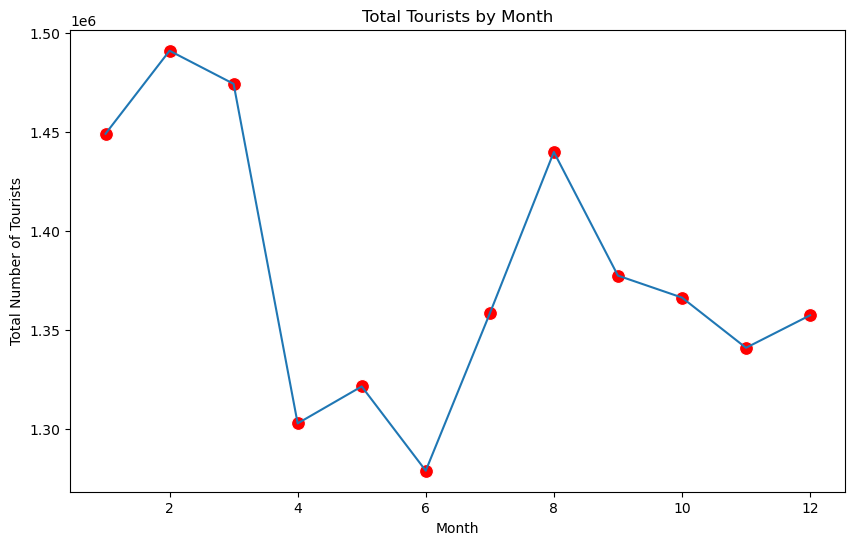

In [111]:
# Filter for 'Total International Visitor Arrivals By Inbound Tourism Markets'
tourism_total_2024 = tourism[tourism['DataSeries'] == 'Total International Visitor Arrivals By Inbound Tourism Markets'].copy()

# Drop the 'DataSeries' column
tourism_total_2024 = tourism_total_2024.drop(columns=['DataSeries'])

# Ensure 'year_month' is in datetime format
tourism_total_2024['year_month'] = pd.to_datetime(tourism_total_2024['year_month'], format='%Y%b')

# Filter for entries in the year 2024
tourism_total_2024 = tourism_total_2024[tourism_total_2024['year_month'].dt.year == 2024]

# Extract the month
tourism_total_2024['month'] = tourism_total_2024['year_month'].dt.month

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=tourism_total_2024, x='month', y='no_of_visitors', ax=ax)
sns.scatterplot(data=tourism_total_2024, x='month', y='no_of_visitors', ax=ax, color='red', s=100)
ax.set_title('Total Tourists by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Total Number of Tourists')
plt.show()


We can see that there are general increases during February, August, October and a slight increase in December. The largest increases are in February and August. There is also a dip in November and subsequent increase in December. This trend applies for both average wait times in Universal Studios Singapore, and also for the number of tourists coming into Singapore in the year 2024.

#### Weather Patterns vs. Wait Times

Create a table with statistical summaries for each day's wait times in Universal Studios Singapore.

In [130]:
# Ensure that date is in datetime format
wait_time_details = wait_time.copy()
wait_time_details['date'] = pd.to_datetime(wait_time_details['date'])

# Filter the DataFrame to include only the date and wait_time columns
wait_time_details = wait_time_details.filter(['date', 'wait_time'])

# Group by date and calculate the average, maximum, and minimum wait times
wait_time_details = wait_time_details.groupby('date').agg(
    avg_wait=('wait_time', 'mean'),
    max_wait=('wait_time', 'max'),
    min_wait=('wait_time', 'min')
).reset_index()

# Display the summary DataFrame
display(wait_time_details.head())

,date,avg_wait,max_wait,min_wait
0,2024-01-01,16.755906,25,7
1,2024-01-02,20.443396,30,7
2,2024-01-03,17.870370,26,8
3,2024-01-04,11.638889,16,7
4,2024-01-05,17.268519,24,7


In [145]:
# Ensure that date is in datetime format
weather['Date'] = pd.to_datetime(weather['Date'], format = '%d/%m/%Y')

# Filter for entries in the year 2024
weather_2024 = weather[weather['Date'].dt.year == 2024].copy().reset_index()
weather_2024 = weather_2024.drop(columns=['index'])

weather_2024 = weather_2024.filter(['Date', 'Daily Rainfall Total (mm)', 'Maximum Temperature (°C)', 'Minimum Temperature (°C)', 'Rain'])

# Display the filtered DataFrame
display(weather_2024.head())

,Date,Daily Rainfall Total (mm),Maximum Temperature (°C),Minimum Temperature (°C),Rain
0,2024-01-01,0.0,29.2,25.2,0
1,2024-01-02,5.6,29.3,22.6,1
2,2024-01-03,0.4,31.8,25.1,1
3,2024-01-04,10.0,29.2,25.9,1
4,2024-01-05,7.2,31.7,28.0,1


In [154]:
merge_weather_wait_time = pd.merge(wait_time_details, weather_2024, left_on='date', right_on='Date', how='inner')
merge_weather_wait_time = merge_weather_wait_time.drop(columns=['Date'])

def categorize_weather(row):
    if row['Daily Rainfall Total (mm)'] > 5:
        return 'Rainy'
    elif row['Maximum Temperature (°C)'] > 32:
        return 'Hot'
    else:
        return 'Mild'

merge_weather_wait_time['weather_category'] = merge_weather_wait_time.apply(categorize_weather, axis=1)

display(merge_weather_wait_time.head())

,date,avg_wait,max_wait,min_wait,Daily Rainfall Total (mm),Maximum Temperature (°C),Minimum Temperature (°C),Rain,weather_category
0,2024-01-01,16.755906,25,7,0.0,29.2,25.2,0,Mild
1,2024-01-02,20.443396,30,7,5.6,29.3,22.6,1,Rainy
2,2024-01-03,17.870370,26,8,0.4,31.8,25.1,1,Mild
3,2024-01-04,11.638889,16,7,10.0,29.2,25.9,1,Rainy
4,2024-01-05,17.268519,24,7,7.2,31.7,28.0,1,Rainy


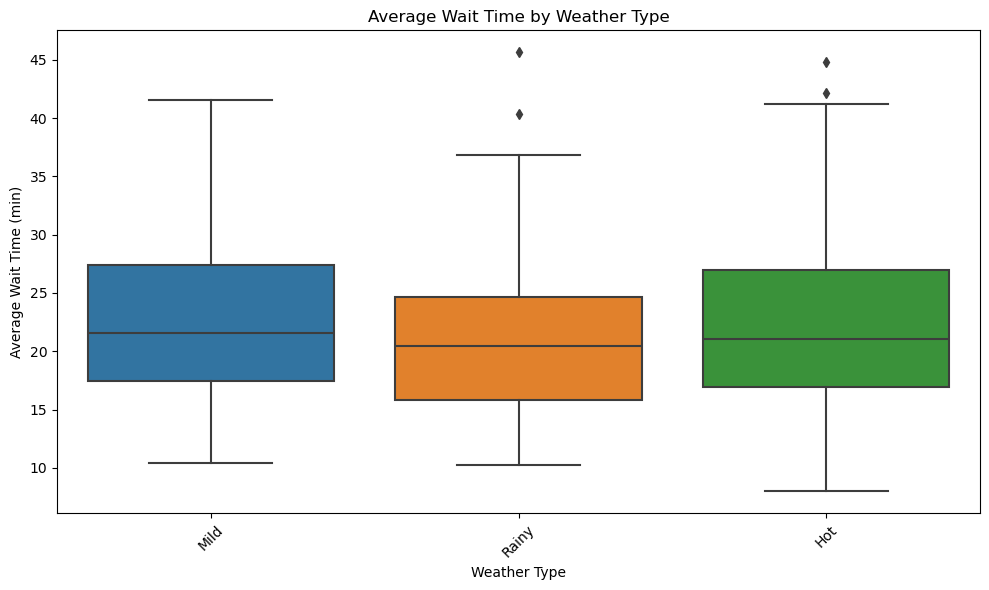

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merge_weather_wait_time, x='weather_category', y='avg_wait')
plt.title('Average Wait Time by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Average Wait Time (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Weather Forecast vs. Wait Times

In [158]:
# Ensure forecast_date and record_date are in datetime format
four_day_forecast['forecast_date'] = pd.to_datetime(four_day_forecast['forecast_date'])
four_day_forecast['record_date'] = pd.to_datetime(four_day_forecast['record_date'])

# Filter for forecast_date in the year 2024
forecast_2024 = four_day_forecast[four_day_forecast['forecast_date'].dt.year == 2024]

# Calculate the number of days prior the forecast was made
forecast_2024['days_prior'] = (forecast_2024['forecast_date'] - forecast_2024['record_date']).dt.days

# Group by the number of days prior
grouped_forecast = forecast_2024.groupby('days_prior')

# Split the dataset by the number of days prior
split_datasets = {days_prior: group for days_prior, group in grouped_forecast}

# Save each split dataset as a variable
for days_prior, df in split_datasets.items():
    vars()[f'forecast_{days_prior}_days_prior'] = df
    print(f"DataFrame for {days_prior} days prior created.")
    display(df.head())

DataFrame for 1 days prior created.


/var/folders/lh/7rc342j54xnd2xl5w63b9dy00000gn/T/ipykernel_2226/3674501516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_2024['days_prior'] = (forecast_2024['forecast_date'] - forecast_2024['record_date']).dt.days


,record_date,forecast_timestamp,forecast_date,day,temp_low,temp_high,humidity_low,humidity_high,forecast_summary,forecast_text,wind_speed_low,wind_speed_high,wind_direction,days_prior
10884,2023-12-31,2024-01-01T00:00:00+08:00,2024-01-01,Monday,24,32,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,1
10888,2024-01-01,2024-01-02T00:00:00+08:00,2024-01-02,Tuesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,1
10892,2024-01-02,2024-01-03T00:00:00+08:00,2024-01-03,Wednesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,15,25,N,1
10896,2024-01-09,2024-01-10T00:00:00+08:00,2024-01-10,Wednesday,23,32,65,95,Afternoon thundery showers,Thundery Showers,15,25,NE,1
10900,2024-01-10,2024-01-11T00:00:00+08:00,2024-01-11,Thursday,23,32,65,95,Afternoon thundery showers,Thundery Showers,10,25,NE,1


DataFrame for 2 days prior created.


,record_date,forecast_timestamp,forecast_date,day,temp_low,temp_high,humidity_low,humidity_high,forecast_summary,forecast_text,wind_speed_low,wind_speed_high,wind_direction,days_prior
10881,2023-12-30,2024-01-01T00:00:00+08:00,2024-01-01,Monday,23,33,65,95,Afternoon thundery showers,Thundery Showers,10,25,NE,2
10885,2023-12-31,2024-01-02T00:00:00+08:00,2024-01-02,Tuesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,2
10889,2024-01-01,2024-01-03T00:00:00+08:00,2024-01-03,Wednesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,25,N,2
10893,2024-01-02,2024-01-04T00:00:00+08:00,2024-01-04,Thursday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,N,2
10897,2024-01-09,2024-01-11T00:00:00+08:00,2024-01-11,Thursday,23,32,65,95,Afternoon thundery showers,Thundery Showers,10,25,NNE,2


DataFrame for 3 days prior created.


,record_date,forecast_timestamp,forecast_date,day,temp_low,temp_high,humidity_low,humidity_high,forecast_summary,forecast_text,wind_speed_low,wind_speed_high,wind_direction,days_prior
10878,2023-12-29,2024-01-01T00:00:00+08:00,2024-01-01,Monday,24,33,65,95,Afternoon thundery showers.,Thundery Showers,10,25,NE,3
10882,2023-12-30,2024-01-02T00:00:00+08:00,2024-01-02,Tuesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,3
10886,2023-12-31,2024-01-03T00:00:00+08:00,2024-01-03,Wednesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,25,NNE,3
10890,2024-01-01,2024-01-04T00:00:00+08:00,2024-01-04,Thursday,22,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,3
10894,2024-01-02,2024-01-05T00:00:00+08:00,2024-01-05,Friday,23,32,70,95,Afternoon and evening thundery showers,Thundery Showers,10,20,NE,3


DataFrame for 4 days prior created.


,record_date,forecast_timestamp,forecast_date,day,temp_low,temp_high,humidity_low,humidity_high,forecast_summary,forecast_text,wind_speed_low,wind_speed_high,wind_direction,days_prior
10875,2023-12-28,2024-01-01T00:00:00+08:00,2024-01-01,Monday,24,33,60,95,Afternoon thundery showers.,Thundery Showers,10,20,NE,4
10879,2023-12-29,2024-01-02T00:00:00+08:00,2024-01-02,Tuesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,4
10883,2023-12-30,2024-01-03T00:00:00+08:00,2024-01-03,Wednesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,4
10887,2023-12-31,2024-01-04T00:00:00+08:00,2024-01-04,Thursday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,25,NNE,4
10891,2024-01-01,2024-01-05T00:00:00+08:00,2024-01-05,Friday,24,33,65,95,Afternoon thundery showers,Thundery Showers,5,15,NE,4
